### 导库

In [1]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline 
import xgboost as xgb
import seaborn as sns 

np.random.seed(42) 
sns.set_style('dark')
plt.style.use('ggplot')
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold

### 导入数据

In [3]:
# orig_data = pd.read_excel(r"C:\Users\19677\Nutstore\1\data1\师兄数据\GW_train_minmax.xlsx")
orig_data = pd.read_excel(r"F:\1\data1\全国数据\ML营地\ML_camp_county\train_minmax_county.xlsx")


In [26]:
X = orig_data.iloc[ :,4:10]
y = orig_data.iloc[:,-2]
X


,DEM,GDP,NDVI,POP,RIVER,ROAD
0,0.022131,0.062483,0.613872,0.160557,0.157143,0.053152
1,0.013677,0.045211,0.532568,0.192191,0.142857,0.071671
2,0.022042,0.098790,0.647406,0.198442,0.142857,0.094137
3,0.145783,0.001140,0.939812,0.007260,0.142857,0.007027
4,0.077805,0.002331,0.835735,0.018344,0.142857,0.014803
...,...,...,...,...,...,...
1978,0.002916,0.000806,0.894777,0.015360,0.161905,0.005886
1979,0.191840,0.000228,0.973863,0.003610,0.154639,0.000837
1980,0.206081,0.000440,0.793080,0.005771,0.142857,0.001127
1981,0.208915,0.000047,0.905375,0.000550,0.165024,0.000792


In [27]:
X.describe()

,DEM,GDP,NDVI,POP,RIVER,ROAD
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000
mean,0.150333,0.006314,0.775405,0.029732,0.174329,0.009092
std,0.202158,0.024777,0.198929,0.078339,0.071892,0.032255
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014481,0.000228,0.701762,0.003441,0.142857,0.000950
50%,0.070162,0.000810,0.843596,0.009209,0.150476,0.002062
75%,0.213732,0.002746,0.914025,0.021983,0.176471,0.006623
max,1.000000,0.449267,0.997975,1.000000,1.000000,1.000000


In [28]:
y

0       18
1        2
2        3
3        7
4       14
        ..
1978     0
1979     0
1980     0
1981     0
1982     0
Name: count, Length: 1983, dtype: int64

In [29]:
print(X.shape,y.shape)

(1983, 6) (1983,)


### 变量相关性


<AxesSubplot:>

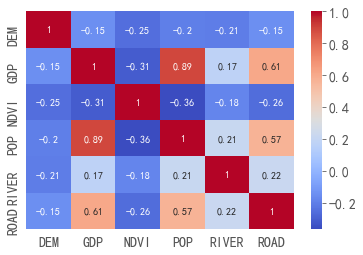

In [30]:
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)

### 划分训练集、测试集，并标准化


In [31]:
# 划分数据集，80% 训练数据和 20% 测试数据
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print(X_train.shape,y_train.shape)

(1388, 6) (1388,)


### 建立XGBoost模型

In [33]:
import xgboost
from sklearn.utils.fixes import loguniform

xgb = xgboost.XGBRegressor()

In [34]:
colsample_bytree = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
boost_params = ["gblinear", "gbtree"]
base_score = [0.05,0.15,0.25,0.50,0.75,1.0]
max_depth = [2,3,4,5,6,7,8,9,10]
learning_rate= [0.025,0.5,0.1,0.125,0.15,0.2]
min_child_weight = [1,3,5,7,9]
n_estimators = [50,100,150,200,250,300,350,400,500,600]

params = {
    "colsample_bytree":colsample_bytree,
    "booster":boost_params,
    "max_depth":max_depth,
    "learning_rate":learning_rate,
    "min_child_weight":min_child_weight,
    "n_estimators":n_estimators,
    "base_score":base_score
}

xgb_opt1 = RandomizedSearchCV(xgb, param_distributions=params, cv=10, scoring='r2', n_jobs=-1, n_iter=50, random_state=100)
xgb_opt1.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                   param_distributions={'base_score': [0.05, 0.15, 0.25, 0.5,
                                                       0.75, 1.0],
                                        'boost

In [35]:
xgb_opt1.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [36]:
xgb_opt1.best_score_

0.050612114811222644

In [37]:

xgb_reg = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=3, 
             monotone_constraints='()', n_estimators=50, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
xgb_opt1.best_estimator_.fit(X_train_scaled, y_train)
y_xgb=xgb_opt1.best_estimator_.predict(X_test_scaled)

The absolute error for the XGBOOST Model : 1.4357421726896231
The mean squared error for the XGBOOST Model : 2.373537732698587
The R2-score for the XGBOOST Model : -0.18023026680890752


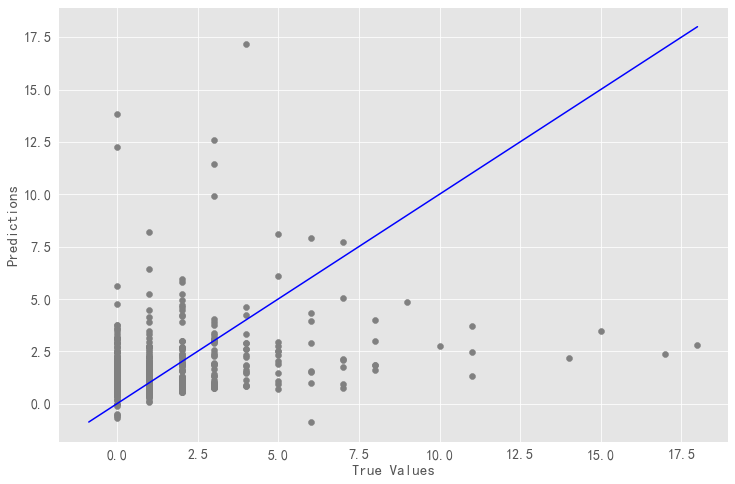

In [39]:
MAE = mean_absolute_error(y_test, y_xgb)
MSE = mean_squared_error(y_test, y_xgb)
R2_xg = r2_score(y_test, y_xgb)
RMSE = np.sqrt(MSE)


print("The absolute error for the XGBOOST Model :", MAE)
print("The mean squared error for the XGBOOST Model :", RMSE)
print("The R2-score for the XGBOOST Model :", R2_xg)
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_xgb, color = 'grey')
plt.xlabel('True Test Values')
plt.ylabel('Predictions from Model')

p1 = max(max(y_xgb), max(y_test))
p2 = min(min(y_xgb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

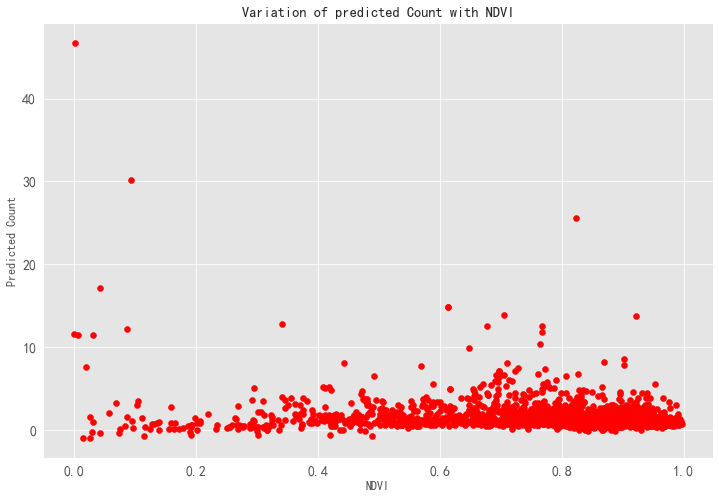

In [41]:
X_scale = scaler.transform(X)

y_pred_xgb = xgb_opt1.best_estimator_.predict(X_scale)

plt.figure(figsize= (12,8))
plt.scatter(X['NDVI'], y_pred_xgb, color='r')
plt.xlabel('NDVI')
plt.ylabel('Predicted Count')
plt.title('Variation of predicted Count with NDVI')
plt.show()



In [42]:
XGB = pd.DataFrame(y_pred_xgb, columns=['XGB'])
XGB.head()

,XGB
0,14.819080
1,3.021883
2,9.903117
3,4.474033
4,4.831201


### 打印特征重要性

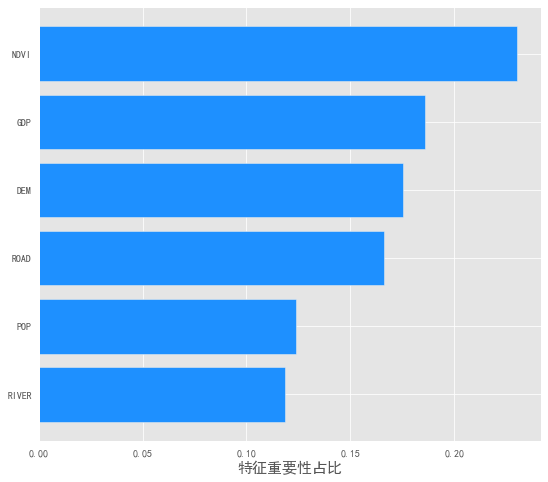

In [45]:
#  解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
#指定字体
# plt.rcParams['font.sans-serif']=['Arial Unicode MS']
# plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(9,8))
features = list(X.columns) #特征名称
importances = xgb_opt1.best_estimator_.feature_importances_ #特征值
indices = np.argsort(importances) #特征值排序
color_set = ('c', 'y', 'm')
plt.barh(range(len(indices)), importances[indices],color='dodgerblue',align='center')
#绘制柱形图    deepskyblue  dodgerblue 
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('特征重要性占比',fontsize=15)
plt.savefig('Feature2.jpg', dpi=900)
plt.show()

### 模型在训练集、测试集上的性能对比

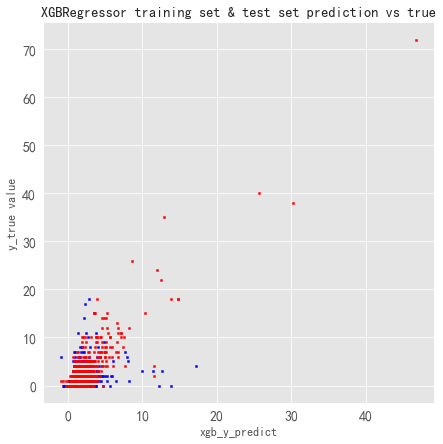

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

y_test_prediction = xgb_opt1.best_estimator_.predict(X_test_scaled)
plt.scatter(y_test_prediction,y_test,marker='X',s=5,c='blue')

y_train_prediction = xgb_opt1.best_estimator_.predict(X_train_scaled)
plt.scatter(y_train_prediction,y_train,marker='X',s=5,c='red')

plt.title('XGBRegressor training set & test set prediction vs true')

plt.xlabel('xgb_y_predict')

plt.ylabel('y_true value')

plt.show()


### Random Forest


In [119]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
params = {'n_estimators' : [100,150,200,250,300,350,400,500,600],
              'max_features' : ['auto','sqrt'],
              'max_depth' : [10,20,30,40,50,60,70,80,90,100],
              'min_samples_split' : [2,3,4,5,6,7,8,9,10],
              'min_samples_leaf' : [1,2,4,6],
              'bootstrap' : [True, False]}
rf_opt = RandomizedSearchCV(estimator = rf, param_distributions = params, scoring = 'r2', n_iter = 50, cv = 10, n_jobs = -1, random_state=100)
rf_opt.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 500,
                                                         600]},
                   random_state=100, scoring='r2')

In [120]:
rf_opt.best_estimator_

RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=6)

In [121]:
rf_reg = RandomForestRegressor(max_depth=90, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=6)

In [122]:
y_rf = rf_reg.fit(X_train_scaled, y_train).predict(X_test_scaled)

The absolute error for the Random Forest Model : 1.9771842599697869
The mean squared error for the Random Forest Model : 4.887702404121089
The R2-score for the Random Forest Model : 0.05913429612521104


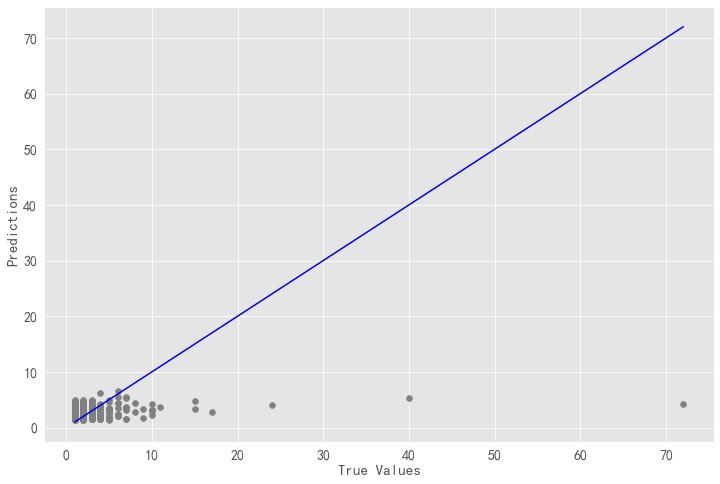

<Figure size 432x288 with 0 Axes>

In [123]:
MAE = mean_absolute_error(y_test, y_rf)
MSE = mean_squared_error(y_test, y_rf)
R2_rf = r2_score(y_test, y_rf)
RMSE = np.sqrt(MSE)


print("The absolute error for the Random Forest Model :", MAE)
print("The mean squared error for the Random Forest Model :", RMSE)
print("The R2-score for the Random Forest Model :", R2_rf)
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_rf, color = 'grey')
plt.xlabel('True Test Values')
plt.ylabel('Predictions from Model')

p1 = max(max(y_rf), max(y_test))
p2 = min(min(y_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()
plt.savefig('Random Forest-model-2000dpi.eps', orientation='landscape', dpi=1600)

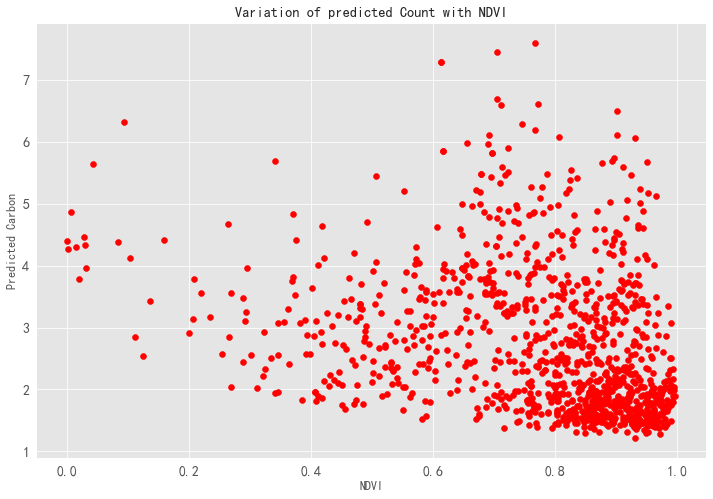

In [126]:
X_scale = scaler.transform(X)

y_pred_rf = rf_reg.predict(X_scale)

plt.figure(figsize= (12,8))
plt.scatter(X['NDVI'], y_pred_rf, color='r')
plt.xlabel('NDVI')
plt.ylabel('Predicted Carbon')
plt.title('Variation of predicted Count with NDVI')
plt.show()

In [127]:
RF = pd.DataFrame(y_pred_rf, columns=["RF"])
RF.head()

,RF
0,7.281835
1,2.086845
2,4.488064
3,5.244863
4,5.411541


### Extra Trees

In [128]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
grids = {
    'n_estimators': [100,150,200,250,300,350,400,500,600],
    'criterion': ['mse', 'mae'],
    'max_depth': [2,8,16,32,50],
    'max_features': ['auto','sqrt','log2'],    
    'bootstrap': [True, False],
    'warm_start': [True, False],
}

extr_optimize = RandomizedSearchCV(model, param_distributions = grids, cv = 10, scoring = 'r2', n_jobs = -1, n_iter = 50, random_state = 100)
extr_optimize.fit(X_train_scaled, y_train)

c:\Users\XZD\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


RandomizedSearchCV(cv=10, estimator=ExtraTreesRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [2, 8, 16, 32, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 500,
                                                         600],
                                        'warm_start': [True, False]},
                   random_state=100, scoring='r2')

In [129]:
extr_optimize.best_estimator_

ExtraTreesRegressor(bootstrap=True, criterion='mae', max_depth=50,
                    max_features='log2', n_estimators=200, warm_start=True)

In [133]:
model_extr = ExtraTreesRegressor(bootstrap=True, criterion='absolute_error', max_depth=50,
                    max_features='log2', n_estimators=200, warm_start=True)

In [134]:
y_extr = model_extr.fit(X_train_scaled, y_train).predict(X_test_scaled)

The absolute error for the Extra Trees Model : 1.9425975975975975
The mean squared error for the Extra Trees Model : 4.769489666796824
The R2-score for the Extra Trees Model : 0.10409501748475258


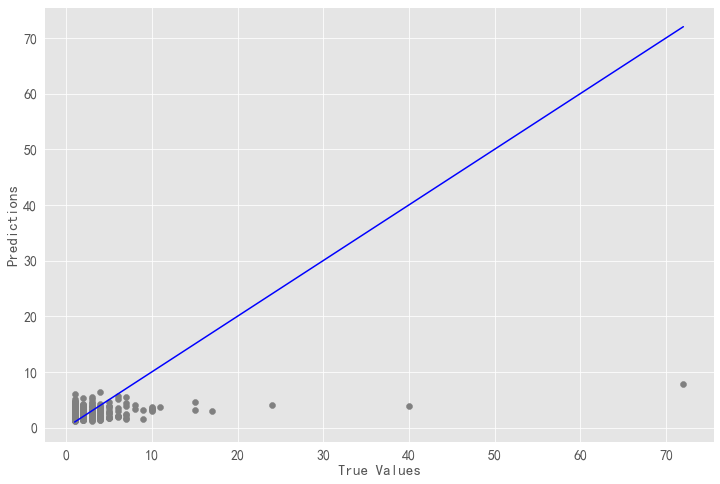

<Figure size 432x288 with 0 Axes>

In [136]:
MAE = mean_absolute_error(y_test, y_extr)
MSE = mean_squared_error(y_test, y_extr)
R2_extr = r2_score(y_test,y_extr)
RMSE = np.sqrt(MSE)


print("The absolute error for the Extra Trees Model :", MAE)
print("The mean squared error for the Extra Trees Model :", RMSE)
print("The R2-score for the Extra Trees Model :", R2_extr)
plt.figure(figsize = (12,8))
plt.scatter(y_test, y_extr, color = 'grey')
plt.xlabel('True Test Values')
plt.ylabel('Predictions from Model')

p1 = max(max(y_extr), max(y_test))
p2 = min(min(y_extr), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()
plt.savefig('Extra Trees-model-2000dpi.eps', orientation='landscape', dpi=1600)

In [138]:
X_scale = scaler.transform(X)
y_pred_extr = model_extr.predict(X_scale)
EXTR = pd.DataFrame(y_pred_extr, columns=['EXTR'])
EXTR.head()

,EXTR
0,14.7775
1,2.8550
2,5.4200
3,4.3775
4,9.4100


### Voting Regressor

In [139]:
from sklearn.ensemble import VotingRegressor

reg1 = xgb_reg 
reg2 = rf_reg 
reg3 = model_extr

v_reg = VotingRegressor([('xgb', reg1), ('rf', reg2), ('et', reg3)])
v_reg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.25, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.5,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.025, max_delta_step=0,
                                          max_depth=6, min_child_weight=5,
                                          missing=nan,
                                          monotone_constraints='()',
                                          n_estimators...
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_w

In [140]:
v_pred = v_reg.predict(X_test_scaled)

The absolute error for the Voting Model : 1.9435591086513107
The mean squared error for the Voting Model : 4.828443541081515
The R2-score for the Voting Model : 0.0818102451401247


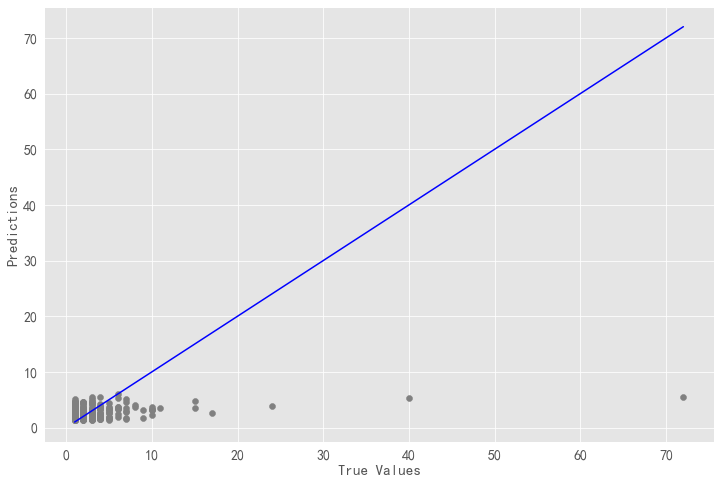

<Figure size 432x288 with 0 Axes>

In [143]:
MAE = mean_absolute_error(y_test, v_pred)
MSE = mean_squared_error(y_test, v_pred)
R2_vt = r2_score(y_test, v_pred)
RMSE = np.sqrt(MSE)


print("The absolute error for the Voting Model :", MAE)
print("The mean squared error for the Voting Model :", RMSE)
print("The R2-score for the Voting Model :", R2_vt)
plt.figure(figsize = (12,8))
plt.scatter(y_test, v_pred, color = 'grey')
plt.xlabel('True Test Values')
plt.ylabel('Predictions from Model')

p1 = max(max(v_pred), max(y_test))
p2 = min(min(v_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()
plt.savefig('Voting-model-2000dpi.eps', orientation='landscape', dpi=1600)

### 全样本预测

In [146]:
all_data = pd.read_excel(r"F:\1\data1\师兄数据\GWR_predict_minmax.xls")

In [148]:
X1 = all_data.iloc[ :,4:10]
y1 = all_data.iloc[:,-1]
X1

,DEM,GDP,NDVI,POP,RIVER,ROAD
0,0.009697,0.403213,0.381881,0.537416,0.142857,0.218870
1,0.010573,0.449267,0.375836,0.563989,0.142857,0.258519
2,0.022131,0.062483,0.613872,0.160557,0.157143,0.053152
3,0.013677,0.045211,0.532568,0.192191,0.142857,0.071671
4,0.027919,0.051523,0.627472,0.171454,0.142857,0.070311
...,...,...,...,...,...,...
2850,0.268434,0.000025,0.280549,0.001130,0.155015,0.001075
2851,0.061732,0.000471,0.754607,0.003651,0.142857,0.000957
2852,0.002825,0.039886,0.312296,0.115532,0.142857,1.000000
2853,0.026929,0.154448,0.823530,0.240048,0.142857,0.254019


In [149]:
y1

0        0
1        0
2       18
3        2
4        0
        ..
2850     0
2851     0
2852     0
2853    40
2854     0
Name: count, Length: 2855, dtype: int64

<AxesSubplot:>

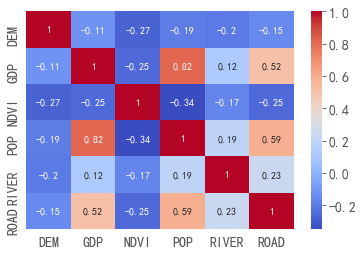

In [150]:
sns.heatmap(X1.corr(), cmap='coolwarm', annot=True)

In [151]:
scaler = StandardScaler()
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=99)
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)


In [152]:
import xgboost
from sklearn.utils.fixes import loguniform

xgb1 = xgboost.XGBRegressor()

In [153]:
colsample_bytree = [0.3,0.4,0.5,0.6,0.7,0.8,0.9]
boost_params = ["gblinear", "gbtree"]
base_score = [0.15,0.25,0.50,0.75,1.0]
max_depth = [2,3,4,5,6,7,8,9,10]
learning_rate= [0.025,0.5,0.1,0.125,0.15,0.2]
min_child_weight = [1,3,5,7,9]
n_estimators = [100,150,200,250,300,350,400,500,600]


params = {
    "colsample_bytree":colsample_bytree,
    "booster":boost_params,
    "max_depth":max_depth,
    "learning_rate":learning_rate,
    "min_child_weight":min_child_weight,
    "n_estimators":n_estimators,
    "base_score":base_score
}

xgb1_opt = RandomizedSearchCV(xgb1, param_distributions=params, cv=10, scoring='r2', n_jobs=-1, n_iter=50, random_state=100)
xgb1_opt.fit(X1_train_scaled, y1_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'base_score': [0.15, 0.25, 0.5, 0.75,
                                                       1.0],
           

In [154]:
xgb1_opt.best_estimator_



XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.025, max_delta_step=0,
             max_depth=6, min_child_weight=5, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [158]:
xgb1_reg = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.025, max_delta_step=0,
             max_depth=6, min_child_weight=5,
             monotone_constraints='()', n_estimators=100, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [159]:
y1_xgb = xgb1_reg.fit(X1_train_scaled, y1_train).predict(X1_test_scaled)

The absolute error for the XGBOOST Model : 1.223790601581982
The mean squared error for the XGBOOST Model : 2.55167490501303
The R2-score for the XGBOOST Model : 0.05631896803864467


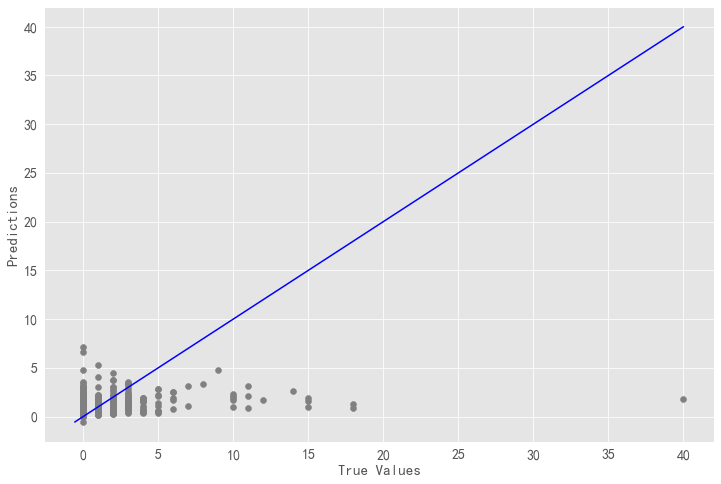

In [160]:
MAE = mean_absolute_error(y1_test, y1_xgb)
MSE = mean_squared_error(y1_test, y1_xgb)
R2_xg = r2_score(y1_test, y1_xgb)
RMSE = np.sqrt(MSE)


print("The absolute error for the XGBOOST Model :", MAE)
print("The mean squared error for the XGBOOST Model :", RMSE)
print("The R2-score for the XGBOOST Model :", R2_xg)
plt.figure(figsize = (12,8))
plt.scatter(y1_test, y1_xgb, color = 'grey')
plt.xlabel('True Test Values')
plt.ylabel('Predictions from Model')

p1 = max(max(y1_xgb), max(y1_test))
p2 = min(min(y1_xgb), min(y1_test))
plt.plot([p1, p2], [p1, p2], 'blue')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()